## q-1-1-2
#### Use different distance measures as applicable.  Plot graph to report accuracy with change  in  value  of  K.

In [1]:
import numpy as np
from numpy import log2 as log
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import operator
import sys

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# filename = sys.argv[1]
filename = "iris"
def loadfile(file_name):
    if file_name=="iris":
        filename = 'input_data/Iris.csv'
        df = pd.read_csv(filename, names = ["a", "b", "c", "d", "Y"])
    elif file_name=="robot1":
        filename = 'input_data/Robot1'
        df = pd.read_csv(filename, delim_whitespace=True, names = ["Y", "a", "b", "c", "d", "e", "f", "g"])
        df = df.drop(['g'],axis=1)
    else:
        filename = 'input_data/Robot2'
        df = pd.read_csv(filename, delim_whitespace=True, names = ["Y", "a", "b", "c", "d", "e", "f", "g"])
        df = df.drop(['g'],axis=1)
    return df

df = loadfile(filename)

In [3]:
Y = df.Y
labels = Y.unique()
X = df.drop(['Y'], axis=1)
if filename != "iris":
    X = pd.DataFrame(preprocessing.normalize(X), columns = ["a","b", "c", "d", "e", "f"])
    

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
df1 = pd.concat([X_train, Y_train],axis=1).reset_index(drop=True)

In [5]:
def manhattan_distance(x, y):   
    return np.sum(abs(x - y))

In [6]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [7]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [8]:
def distance(x, y, flag):
    if flag==1:
        return euclidean_distance(x,y)
    elif flag==2:
        return 1 - cosine_similarity(x,y)
    else:
        return manhattan_distance(x,y)

In [9]:
def predict(X_test,k,flag):
    Y_predict = []
    for index, row in X_test.iterrows():
        dist = {}
        labeldict = {i:0 for i in labels}
        for index1, row1 in df1.iterrows():
            dist[index1] = distance(row,row1[:-1],flag)
        
        od = sorted(dist.items(), key=operator.itemgetter(1))
        count = k
        for i,j in od:
            count-=1
            labeldict[df1.iloc[i].Y]+=1
            if count==0:
                break
                
        ans_label=0
        ans_count=-1
        for i,j in labeldict.iteritems():
            if j>=ans_count:
                ans_label=i
                ans_count=j
        Y_predict.append(ans_label)
    return Y_predict

Text(0.5,1,'k vs accuracy')

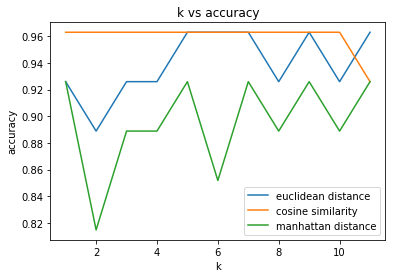

In [10]:
x_axis = [ i for i in xrange(1,12)]
pe = []
pc = []
pm = []

for j in x_axis:
    t = predict(X_test,j,1)
    pe.append(accuracy_score(Y_test,t))
    
for j in x_axis:
    t = predict(X_test,j,2)
    pc.append(accuracy_score(Y_test,t))
    
for j in x_axis:
    t = predict(X_test,j,3)
    pm.append(accuracy_score(Y_test,t))
    
fig,ax = plt.subplots()
ax.plot(x_axis, pe, label="euclidean distance")
ax.plot(x_axis, pc, label="cosine similarity")
ax.plot(x_axis, pm, label="manhattan distance")
ax.legend()
ax.set_xlabel("k")
ax.set_ylabel("accuracy")
ax.set_title("k vs accuracy")